In [2]:
from google.colab import files

In [3]:
!pip install patool

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.3/86.3 kB 3.4 MB/s eta 0:00:00


In [4]:
import patoolib

In [6]:
#patoolib.extract_archive('ca.zip')
patoolib.extract_archive('archive (1).zip', outdir="./extracted_files")

INFO patool: Extracting archive (1).zip ...
INFO:patool:Extracting archive (1).zip ...
INFO patool: ... creating output directory `./extracted_files'.
INFO:patool:... creating output directory `./extracted_files'.
INFO patool: running /usr/bin/7z x -aou -o./extracted_files -- "archive (1).zip"
INFO:patool:running /usr/bin/7z x -aou -o./extracted_files -- "archive (1).zip"
INFO patool: ... archive (1).zip extracted to `./extracted_files'.
INFO:patool:... archive (1).zip extracted to `./extracted_files'.


'./extracted_files'

In [7]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.models import Model, load_model, Sequential

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator( #rescale=1./255,
                              horizontal_flip = True,
                              validation_split=0.2,
                              rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              fill_mode='nearest')


train_generator=datagen.flow_from_directory( '/content/extracted_files/Cars Dataset/train',
                                          target_size=(256,256),
                                          class_mode="categorical",
                                          shuffle = True,
                                          batch_size=16,
                                          subset='training')
image_val=datagen.flow_from_directory( '/content/extracted_files/Cars Dataset/train',
                                        target_size=(256,256),
                                        class_mode="categorical",
                                        shuffle = False,
                                        batch_size=16,
                                        subset='validation')

Found 2684 images belonging to 7 classes.
Found 668 images belonging to 7 classes.


In [11]:

count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[ 41.41179   52.41179   48.41179 ]
  [ 40.67194   51.67194   47.67194 ]
  [ 39.93209   50.93209   46.93209 ]
  ...
  [149.65974  121.09959  115.3195  ]
  [156.5851   132.21913  128.21913 ]
  [167.66809  148.76947  144.76947 ]]

 [[ 46.        57.        53.      ]
  [ 46.        57.        53.      ]
  [ 46.        57.        53.      ]
  ...
  [150.21465  122.0244   116.429276]
  [157.9723   134.16124  130.16124 ]
  [165.54102  146.7349   142.7349  ]]

 [[ 47.671608  58.671608  54.671608]
  [ 47.301685  58.301685  54.301685]
  [ 46.93176   57.93176   53.93176 ]
  ...
  [150.76953  122.94921  117.53905 ]
  [159.35953  136.10335  132.10335 ]
  [163.41396  144.7003   140.7003  ]]

 ...

 [[110.       105.       102.      ]
  [125.27858  120.27858  117.27858 ]
  [121.99955  116.99955  113.99955 ]
  ...
  [134.30809  127.30808  121.30808 ]
  [136.09496  129.09496  123.09495 ]
  [147.50447  140.50447  134.50447 ]]

 [[110.       105.       102.      ]
  [127.68309  122.68309  119.68309 ]


In [12]:
class_names = list(train_generator.class_indices.keys())
class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [13]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

'''test_generator = test_datagen.flow_from_directory(
        '/content/extracted_files/Cars Dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)'''



test_generator=datagen.flow_from_directory( '/content/extracted_files/Cars Dataset/test',
                                          target_size=(256,256),
                                          class_mode="categorical",
                                          shuffle = False,
                                          batch_size=16 )

Found 813 images belonging to 7 classes.


In [14]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[ 17.51084    18.51084    22.638548 ]
  [  2.809717    2.9749944   6.9749947]
  [ 18.33456    19.131714   21.537405 ]
  ...
  [ 44.         51.         67.       ]
  [ 44.         51.         67.       ]
  [ 44.         51.         67.       ]]

 [[ 18.596926   19.596926   23.996159 ]
  [  7.42559     7.862389   11.86239  ]
  [ 12.089556   12.615189   15.563923 ]
  ...
  [ 44.374813   51.374813   67.37482  ]
  [ 44.646336   51.646336   67.64634  ]
  [ 44.91786    51.91786    67.91786  ]]

 [[ 19.683014   20.683014   25.353767 ]
  [ 12.041463   12.749784   16.749784 ]
  [  5.844551    6.098662    9.59044  ]
  ...
  [ 44.662754   52.337246   68.67449  ]
  [ 44.39123    52.60877    69.21754  ]
  [ 44.11971    52.88029    69.76058  ]]

 ...

 [[114.        121.        127.       ]
  [114.        121.        127.       ]
  [114.        121.        127.       ]
  ...
  [ 51.017803   58.017803   68.01781  ]
  [ 42.4745     49.4745     59.4745   ]
  [ 35.80507    42.80507    52.80507  ]]

 [

In [15]:
base_model = tf.keras.applications.EfficientNetB3(include_top=False,weights="imagenet",input_shape =(256,256,3), pooling = "max" )
base_model.trainable = True

x = base_model.output
x = BatchNormalization() (x)
x = Dense(1024, activation = "relu") (x)
x = Dropout(0.3) (x)
x = Dense(512, activation = "relu") (x)
x = Dropout(0.25) (x)
x = Dense(128, activation = "relu") (x)
x = Dropout(0.15) (x)
x = Dense(64, activation = "relu") (x)
x = Dropout(0.15) (x)
outputs = Dense(7, activation = "softmax") (x)

model = Model(inputs = base_model.input, outputs = outputs)

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 256, 256, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 256, 256, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 256, 256, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 257, 257, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 128, 128, 40)   │          1,080 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 128, 128, 40)   │            160 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 128, 128, 40)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 128, 128, 40)   │            360 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 128, 128, 40)   │            160 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 128, 128, 40)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 40)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 40)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 10)       │            410 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 12,962,742 (49.45 MB)

 Trainable params: 12,872,367 (49.10 MB)

 Non-trainable params: 90,375 (353.03 KB)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

'''model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])'''
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001,
                                                amsgrad=True),
              loss =  "categorical_crossentropy",
              metrics = ['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [18]:
import tensorflow as tf
tf.keras.backend.clear_session()


In [19]:
history = model.fit(
    train_generator,
    validation_data=image_val,
    epochs=70,
    callbacks=[early_stop, reduce_lr]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/70
168/168 ━━━━━━━━━━━━━━━━━━━━ 269s 798ms/step - accuracy: 0.4022 - loss: 1.6436 - val_accuracy: 0.6826 - val_loss: 1.4060 - learning_rate: 0.0010
Epoch 2/70
168/168 ━━━━━━━━━━━━━━━━━━━━ 60s 356ms/step - accuracy: 0.6940 - loss: 0.9857 - val_accuracy: 0.6542 - val_loss: 1.1577 - learning_rate: 0.0010
Epoch 3/70
168/168 ━━━━━━━━━━━━━━━━━━━━ 60s 354ms/step - accuracy: 0.7836 - loss: 0.7537 - val_accuracy: 0.7560 - val_loss: 0.9030 - learning_rate: 0.0010
Epoch 4/70
168/168 ━━━━━━━━━━━━━━━━━━━━ 60s 356ms/step - accuracy: 0.8261 - loss: 0.5920 - val_accuracy: 0.8638 - val_loss: 0.5270 - learning_rate: 0.0010
Epoch 5/70
168/168 ━━━━━━━━━━━━━━━━━━━━ 60s 354ms/step - accuracy: 0.8740 - loss: 0.5107 - val_accuracy: 0.8787 - val_loss: 0.4249 - learning_rate: 0.0010
Epoch 6/70
168/168 ━━━━━━━━━━━━━━━━━━━━ 58s 347ms/step - accuracy: 0.8660 - loss: 0.4761 - val_accuracy: 0.7500 - val_loss: 0.7307 - learning_rate: 0.0010
Epoch 7/70
168/168 ━━━━━━━━━━━━━━━━━━━━ 82s 346ms/step - accuracy: 0.

In [20]:
scores = model.evaluate(test_generator)

51/51 ━━━━━━━━━━━━━━━━━━━━ 20s 396ms/step - accuracy: 0.9727 - loss: 0.1091


In [21]:
scores

[0.1487133651971817, 0.9643296599388123]

In [22]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

In [23]:
type(history.history['loss'])

list

In [24]:
len(history.history['loss'])

26

In [25]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.3795405626296997,
 0.9485470652580261,
 0.7291759848594666,
 0.5652645230293274,
 0.48064476251602173]

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

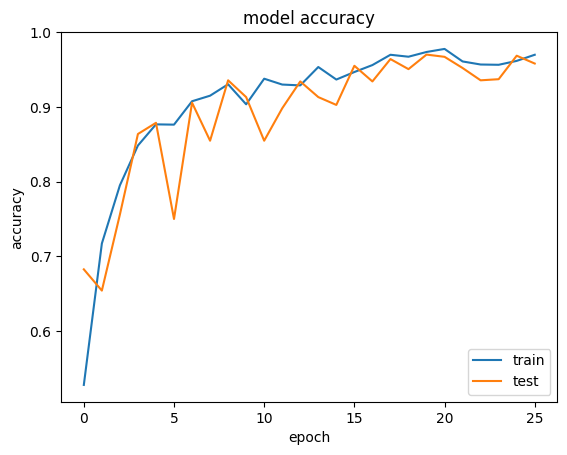

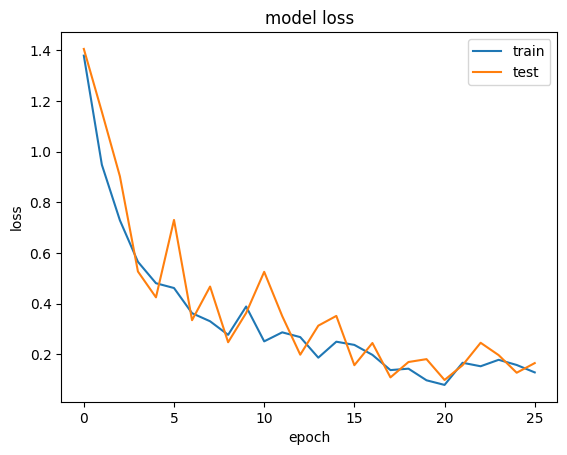

In [28]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [30]:
from sklearn.metrics import classification_report
y_true=test_generator.classes
predictions=model.predict(test_generator,  steps =813)
y_pred = np.argmax(predictions, axis=-1)
print(classification_report(y_true,y_pred))

813/813 ━━━━━━━━━━━━━━━━━━━━ 30s 26ms/step  
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       199
           1       0.97      0.88      0.92        67
           2       1.00      0.95      0.97        75
           3       0.99      0.89      0.94        74
           4       0.98      0.96      0.97       102
           5       0.96      0.99      0.98       106
           6       0.93      0.98      0.96       190

    accuracy                           0.96       813
   macro avg       0.97      0.95      0.96       813
weighted avg       0.97      0.96      0.96       813



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


In [31]:
from sklearn.metrics import confusion_matrix
arr=confusion_matrix(y_true,y_pred)
arr

array([[199,   0,   0,   0,   0,   0,   0],
       [  1,  59,   0,   0,   0,   1,   6],
       [  0,   0,  71,   0,   0,   2,   2],
       [  5,   0,   0,  66,   1,   0,   2],
       [  0,   0,   0,   1,  98,   1,   2],
       [  0,   0,   0,   0,   0, 105,   1],
       [  1,   2,   0,   0,   1,   0, 186]])

<Axes: >

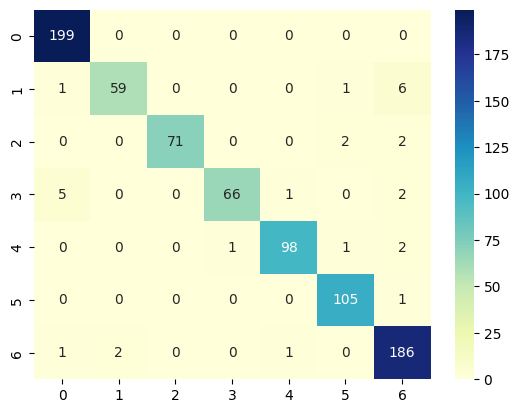

In [32]:
import seaborn as sn
df_cm = pd.DataFrame(arr, range(7), range(7))
sn.heatmap(df_cm, annot=True,fmt="d", cmap="YlGnBu")

In [33]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step


TypeError: only length-1 arrays can be converted to Python scalars

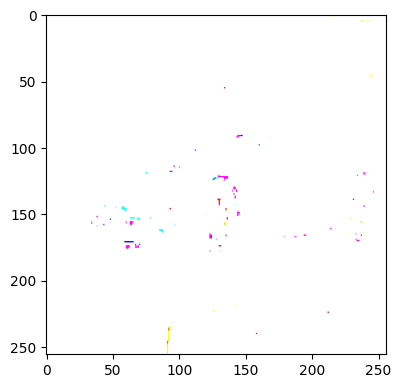

In [34]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")
    break